In [144]:
import csv
import sqlite3
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

#### Load labels

In [145]:
df_labels = pd.read_excel (r'record_conversations.xlsx')

In [146]:
df_labels

,Conversation id,Unnamed: 1,Conv_label,Alabel,Aclassified,Blabel,Bclassified,Agender_label,Agender_classified,Bgender_label,...,Adegree,Ajobfield,Anative,Bspeaker,Bdegree,Bjobfield,Bnative,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Paolo with AI,Human-AI,AI,AI,Human,NaN,NaN,NaN,M,...,NaN,NaN,NaN,Paolo,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Susanne with AI,Human-Human,AI,Human,Human,NaN,NaN,F,F,...,NaN,NaN,NaN,Susanne,NaN,NaN,NaN,NaN,age_range,0 = 0:9
2,3,Thomas with AI,Human-AI,AI,AI,Human,NaN,NaN,F,M,...,NaN,NaN,NaN,Thomas,NaN,NaN,NaN,NaN,NaN,1 = 10:19
3,4,Spandan with AI,Human-AI,AI,NaN,Human,NaN,NaN,NaN,M,...,NaN,NaN,NaN,Spandan,NaN,NaN,NaN,NaN,NaN,2 = 20-29
4,5,Giuseppe with AI,Human-AI,AI,AI,Human,NaN,NaN,F,M,...,NaN,NaN,NaN,Giuseppe,NaN,NaN,NaN,NaN,NaN,3 = 30-39
5,6,Lan with Marta,Human-Human,Human,Human,Human,AI,F,F,F,...,NaN,NaN,NaN,Lan,NaN,NaN,NaN,NaN,NaN,4 = 40-49
6,7,Hayoung with Marcelo,Human-Human,Human,AI,Human,AI,M,F,F,...,NaN,NaN,NaN,Hayoung,NaN,NaN,NaN,NaN,NaN,5 = 50-59
7,8,Alona with serena,Human-Human,Human,AI,Human,Human,F,M,F,...,NaN,NaN,NaN,Serena,NaN,NaN,NaN,NaN,NaN,6 = 50-69
8,9,Isaac with AI,Human-AI,AI,Human,Human,NaN,NaN,F,M,...,NaN,NaN,NaN,Isaac,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Hayoung with Isaac,Human-Human,Human,AI,Human,AI,M,F,F,...,NaN,NaN,NaN,Hayoung,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
conv_list_Alab = df_labels["Alabel"]
#print(conv_list_Alab)
conv_list_Blab = df_labels["Blabel"]
#print(conv_list_Blab)

#### Create dataframe to store labels and mturk results

In [148]:
# run this cell to reset the results loading

column_names = ["hit id", "hit len", "Alabel", "Aresponse", "Blabel", "Bresponse"]


df_all_res = pd.DataFrame(columns = column_names)

num_conv_tot = 69
len_list = [3,6,9,12,15]


for c in range(1,num_conv_tot+1):
    for l in len_list: 
        Alab = conv_list_Alab[c-1]
        if Alab == "Human":
            Alab = "H"
        Blab = conv_list_Blab[c-1]
        if Blab == "Human":
            Blab = "H"
        df_all_res.loc[len(df_all_res.index)] = [c,l,Alab,[],Blab,[]]

In [149]:
df_all_res.head()

,hit id,hit len,Alabel,Aresponse,Blabel,Bresponse
0,1,3,AI,[],H,[]
1,1,6,AI,[],H,[]
2,1,9,AI,[],H,[]
3,1,12,AI,[],H,[]
4,1,15,AI,[],H,[]


#### Load mturk results

In [150]:
con = sqlite3.connect('participants_Aug19_73.db')
# Load the data into a DataFrame
df1 = pd.read_sql_query("SELECT * from TuringConversationalAI", con)

In [151]:
df1

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
0,A2QVI3NRIIK35Y:37W3JXSD67T9R20HEVAVECSZTKVWYD,37W3JXSD67T9R20HEVAVECSZTKVWYD,A2QVI3NRIIK35Y,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.231.2,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:16:57.021939,None,None,0.0,1,live,None
1,A28OD52SMLYQ16:3U5JL4WY5LU8IVRNZTIA062Z7L2X4M,3U5JL4WY5LU8IVRNZTIA062Z7L2X4M,A28OD52SMLYQ16,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,81.161.7.76,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:19.528828,2022-08-19 03:33:17.730253,2022-08-19 03:43:35.789579,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
2,A2Q0XPK1CBAKFA:3E4GGUZ1T9CSVHDTWWKXHXXZRYS2K7,3E4GGUZ1T9CSVHDTWWKXHXXZRYS2K7,A2Q0XPK1CBAKFA,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,152.36.156.190,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:48.675669,2022-08-19 03:19:34.640553,None,0.0,6,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
3,AIDO1EW8PZCTM:3Z2R0DQ0JIZP9HLJ0A9UJ2KU71W2EN,3Z2R0DQ0JIZP9HLJ0A9UJ2KU71W2EN,AIDO1EW8PZCTM,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,104.219.234.50,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:56.879691,2022-08-19 03:19:56.928634,2022-08-19 03:23:32.316079,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
4,A2Q03D83LCCJNN:3PXX5PX6LYJG7H433Y0JOCX7GSBAB2,3PXX5PX6LYJG7H433Y0JOCX7GSBAB2,A2Q03D83LCCJNN,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.219.16.76,mozilla,macos,en-US,0,0,1.0,2022-08-19 03:19:01.081042,2022-08-19 03:20:22.907486,2022-08-19 03:21:40.024057,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
5,A2CTBAHECDQSIX:3QUO65DNQV9K5K7AD8MWUX90UULUO1,3QUO65DNQV9K5K7AD8MWUX90UULUO1,A2CTBAHECDQSIX,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.229.235,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:20.297305,2022-08-19 03:19:51.698905,2022-08-19 05:24:22.720813,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
6,A1SVQRLUX3Z8S:3EKVH9QMEZPKHB7J4FYADK297PV2DU,3EKVH9QMEZPKHB7J4FYADK297PV2DU,A1SVQRLUX3Z8S,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.226.27,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:22.984144,2022-08-19 03:20:38.145783,2022-08-19 03:24:06.839447,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
7,A3FI6UEQ9ZJEWH:3VZLGYJEYMVOLSFCKM80U2F88G5ZX0,3VZLGYJEYMVOLSFCKM80U2F88G5ZX0,A3FI6UEQ9ZJEWH,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.228.129,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:23.881634,2022-08-19 03:19:33.663031,None,0.0,6,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
8,A8K19FZIUU2TE:3C2NJ6JBKB2T3NYWT9CD9PE3LTX2NC,3C2NJ6JBKB2T3NYWT9CD9PE3LTX2NC,A8K19FZIUU2TE,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.219.17.242,mozilla,macos,en-US,0,0,1.0,2022-08-19 03:19:25.178504,2022-08-19 03:22:27.827524,2022-08-19 03:23:46.008159,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
9,ABLZE51NE44U8:32XVDSJFP0INL5DWH8XDWAP3G3N2MC,32XVDSJFP0INL5DWH8XDWAP3G3N2MC,ABLZE51NE44U8,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.226.101,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:20:09.503206,2022-08-19 03:22:41.658352,2022-08-19 03:26:52.467892,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."


In [152]:
num_workers = df1.shape[0]
print("we currently have "+str(num_workers)+" workers from first dataframe")

we currently have 73 workers from first dataframe


In [153]:
con = sqlite3.connect('participants.db')
# Load the data into a DataFrame
df2 = pd.read_sql_query("SELECT * from TuringConversationalAI", con)
num_workers = df2.shape[0]
print("we currently have "+str(num_workers)+" workers from second dataframe")

we currently have 31 workers from second dataframe


In [154]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [155]:
df

,uniqueid,assignmentid,workerid,hitid,ipaddress,browser,platform,language,cond,counterbalance,codeversion,beginhit,beginexp,endhit,bonus,status,mode,datastring
0,A2QVI3NRIIK35Y:37W3JXSD67T9R20HEVAVECSZTKVWYD,37W3JXSD67T9R20HEVAVECSZTKVWYD,A2QVI3NRIIK35Y,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.231.2,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:16:57.021939,None,None,0.0,1,live,None
1,A28OD52SMLYQ16:3U5JL4WY5LU8IVRNZTIA062Z7L2X4M,3U5JL4WY5LU8IVRNZTIA062Z7L2X4M,A28OD52SMLYQ16,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,81.161.7.76,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:19.528828,2022-08-19 03:33:17.730253,2022-08-19 03:43:35.789579,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
2,A2Q0XPK1CBAKFA:3E4GGUZ1T9CSVHDTWWKXHXXZRYS2K7,3E4GGUZ1T9CSVHDTWWKXHXXZRYS2K7,A2Q0XPK1CBAKFA,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,152.36.156.190,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:48.675669,2022-08-19 03:19:34.640553,None,0.0,6,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
3,AIDO1EW8PZCTM:3Z2R0DQ0JIZP9HLJ0A9UJ2KU71W2EN,3Z2R0DQ0JIZP9HLJ0A9UJ2KU71W2EN,AIDO1EW8PZCTM,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,104.219.234.50,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:18:56.879691,2022-08-19 03:19:56.928634,2022-08-19 03:23:32.316079,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
4,A2Q03D83LCCJNN:3PXX5PX6LYJG7H433Y0JOCX7GSBAB2,3PXX5PX6LYJG7H433Y0JOCX7GSBAB2,A2Q03D83LCCJNN,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.219.16.76,mozilla,macos,en-US,0,0,1.0,2022-08-19 03:19:01.081042,2022-08-19 03:20:22.907486,2022-08-19 03:21:40.024057,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
5,A2CTBAHECDQSIX:3QUO65DNQV9K5K7AD8MWUX90UULUO1,3QUO65DNQV9K5K7AD8MWUX90UULUO1,A2CTBAHECDQSIX,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.229.235,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:20.297305,2022-08-19 03:19:51.698905,2022-08-19 05:24:22.720813,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
6,A1SVQRLUX3Z8S:3EKVH9QMEZPKHB7J4FYADK297PV2DU,3EKVH9QMEZPKHB7J4FYADK297PV2DU,A1SVQRLUX3Z8S,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.226.27,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:22.984144,2022-08-19 03:20:38.145783,2022-08-19 03:24:06.839447,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
7,A3FI6UEQ9ZJEWH:3VZLGYJEYMVOLSFCKM80U2F88G5ZX0,3VZLGYJEYMVOLSFCKM80U2F88G5ZX0,A3FI6UEQ9ZJEWH,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.228.129,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:19:23.881634,2022-08-19 03:19:33.663031,None,0.0,6,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
8,A8K19FZIUU2TE:3C2NJ6JBKB2T3NYWT9CD9PE3LTX2NC,3C2NJ6JBKB2T3NYWT9CD9PE3LTX2NC,A8K19FZIUU2TE,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.219.17.242,mozilla,macos,en-US,0,0,1.0,2022-08-19 03:19:25.178504,2022-08-19 03:22:27.827524,2022-08-19 03:23:46.008159,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."
9,ABLZE51NE44U8:32XVDSJFP0INL5DWH8XDWAP3G3N2MC,32XVDSJFP0INL5DWH8XDWAP3G3N2MC,ABLZE51NE44U8,32XN26MTXZ4UWTU4C7NJOQL5OWP0L8,208.218.226.101,chrome,windows,UNKNOWN,0,0,1.0,2022-08-19 03:20:09.503206,2022-08-19 03:22:41.658352,2022-08-19 03:26:52.467892,0.0,5,live,"{""status"": ""user data saved"", ""assignmentId"": ..."


In [156]:
num_workers = df.shape[0]
print("we currently have "+str(num_workers)+" workers in total")

we currently have 104 workers in total


In [157]:
hit_topic_label = []
for i in range(1,15+1):
    hit_topic_label.append(1)
for i in range(16,30+1):
    hit_topic_label.append(2)
for i in range(31,46+1):
    hit_topic_label.append(3)
for i in range(47,60+1):
    hit_topic_label.append(1)
for i in range(61,69+1):
    hit_topic_label.append(2)

    
    
print(hit_topic_label)
print(len(hit_topic_label))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
69


In [158]:
rowidc = [] # stores the indices of the result framework that are changed
H_responses_all = [] # all cases together
AI_responses_all = []
H_responses_len3 = []
AI_responses_len3 = []
H_responses_len6 = []
AI_responses_len6 = []
H_responses_len9 = []
AI_responses_len9 = []
H_responses_len12 = []
AI_responses_len12 = []
H_responses_len15 = []
AI_responses_len15 = []

H_inHH_responses_all = [] # for H-H or AI-AI
AI_inAIAI_responses_all = []
H_inHH_responses_len3 = []
AI_inAIAI_responses_len3 = []
H_inHH_responses_len6 = []
AI_inAIAI_responses_len6 = []
H_inHH_responses_len9 = []
AI_inAIAI_responses_len9 = []
H_inHH_responses_len12 = []
AI_inAIAI_responses_len12 = []
H_inHH_responses_len15 = []
AI_inAIAI_responses_len15 = []

H_inHAI_responses_all = [] # for H-AI
AI_inHAI_responses_all = []
H_inHAI_responses_len3 = []
AI_inHAI_responses_len3 = []
H_inHAI_responses_len6 = []
AI_inHAI_responses_len6 = []
H_inHAI_responses_len9 = []
AI_inHAI_responses_len9 = []
H_inHAI_responses_len12 = []
AI_inHAI_responses_len12 = []
H_inHAI_responses_len15 = []
AI_inHAI_responses_len15 = []


num_conv = 2
for w in range(1,30):
    if df["mode"][w] in ["live","debug","sandbox"] and df["endhit"][w] is not None:
        print("")
        print("#### Worker {} ####".format(w))
        # load worker's data
        data = json.loads(df["datastring"][w])
        Wgender = data['questiondata']['Wgender']
        Wage = data['questiondata']['Wage']
        Wlanguage = data['questiondata']['Wlanguage']
        Wdegree = data['questiondata']['Wdegree']
        Wfield = data['questiondata']['Wfield']
        print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)
        for c in range(num_conv):
            # load responses to conv1
            conv1_hit = data['data'][3+c]['trialdata']['hit']
            conv1_len = data['data'][3+c]['trialdata']['hit_len']
            conv1_Aclass = data['data'][3+c]['trialdata']['Aclass']
            conv1_Bclass = data['data'][3+c]['trialdata']['Bclass']
            conv1_topic = data['data'][3+c]['trialdata']['topic']
            if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                topic_correct = 'Keep'
            else:
                topic_correct = 'Reject'
            print(c,"conv:",conv1_hit,conv1_len,conv1_Aclass,conv1_Bclass,conv1_topic,topic_correct)
            if topic_correct == 'Keep':
                row_index = df_all_res.loc[(df_all_res["hit id"] == conv1_hit) & (df_all_res["hit len"] == conv1_len)].index[0]
                df_all_res.loc[row_index, "Aresponse"].append(conv1_Aclass)
                df_all_res.loc[row_index, "Bresponse"].append(conv1_Bclass)
                rowidc.append(row_index)
                # check if correct or not
                if conv_list_Alab[conv1_hit-1] == 'Human':
                    if conv1_Aclass == 'H':
                        out = 1
                    else:
                        out = 0
                    H_responses_all.append(out)
                    if conv1_len == 3:
                        H_responses_len3.append(out)
                    elif conv1_len == 6:
                        H_responses_len6.append(out)
                    elif conv1_len == 9:
                        H_responses_len9.append(out)
                    elif conv1_len == 12:
                        H_responses_len12.append(out)
                    elif conv1_len == 15:
                        H_responses_len15.append(out)
                    if conv_list_Blab[conv1_hit-1] == 'Human':
                        H_inHH_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHH_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHH_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHH_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHH_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHH_responses_len15.append(out)
                    else:
                        H_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHAI_responses_len15.append(out)
                        
                    
                elif conv_list_Alab[conv1_hit-1] == 'AI':
                    if conv1_Aclass == 'AI':
                        out = 1
                    else:
                        out = 0
                    AI_responses_all.append(out)
                    if conv1_len == 3:
                        AI_responses_len3.append(out)
                    elif conv1_len == 6:
                        AI_responses_len6.append(out)
                    elif conv1_len == 9:
                        AI_responses_len9.append(out)
                    elif conv1_len == 12:
                        AI_responses_len12.append(out)
                    elif conv1_len == 15:
                        AI_responses_len15.append(out)
                    if conv_list_Blab[conv1_hit-1] == 'AI':
                        AI_inAIAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inAIAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inAIAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inAIAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inAIAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inAIAI_responses_len15.append(out)
                    else:
                        AI_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inHAI_responses_len15.append(out)
                    
                if conv_list_Blab[conv1_hit-1] == 'Human':
                    if conv1_Bclass == 'H':
                        out = 1
                    else:
                        out = 0
                    H_responses_all.append(out)
                    if conv1_len == 3:
                        H_responses_len3.append(out)
                    elif conv1_len == 6:
                        H_responses_len6.append(out)
                    elif conv1_len == 9:
                        H_responses_len9.append(out)
                    elif conv1_len == 12:
                        H_responses_len12.append(out)
                    elif conv1_len == 15:
                        H_responses_len15.append(out)
                    if conv_list_Alab[conv1_hit-1] == 'Human':
                        H_inHH_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHH_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHH_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHH_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHH_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHH_responses_len15.append(out)
                    else:
                        H_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHAI_responses_len15.append(out)
                        
                elif conv_list_Blab[conv1_hit-1] == 'AI':
                    if conv1_Bclass == 'AI':
                        out = 1
                    else:
                        out = 0
                    AI_responses_all.append(out)
                    if conv1_len == 3:
                        AI_responses_len3.append(out)
                    elif conv1_len == 6:
                        AI_responses_len6.append(out)
                    elif conv1_len == 9:
                        AI_responses_len9.append(out)
                    elif conv1_len == 12:
                        AI_responses_len12.append(out)
                    elif conv1_len == 15:
                        AI_responses_len15.append(out)
                    if conv_list_Alab[conv1_hit-1] == 'AI':
                        AI_inAIAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inAIAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inAIAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inAIAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inAIAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inAIAI_responses_len15.append(out)
                    else:
                        AI_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inHAI_responses_len15.append(out)
                

num_conv = 20
worker_accepted = 0
worker_rejected = 0
for w in range(31,num_workers):
    if df["mode"][w] in ["live","debug","sandbox"] and df["endhit"][w] is not None:
        print("")
        print("#### Worker {} ####".format(w))
        # load worker's data
        data = json.loads(df["datastring"][w])
        Wgender = data['questiondata']['Wgender']
        Wage = data['questiondata']['Wage']
        Wlanguage = data['questiondata']['Wlanguage']
        Wdegree = data['questiondata']['Wdegree']
        Wfield = data['questiondata']['Wfield']
        print("% W data",Wgender,Wage,Wlanguage,Wdegree,Wfield)
        # keep a worker only if most of its answers are correct
        thr = 15
        corr = 0        
        for c in range(num_conv):
            # load responses to conv1
            conv1_hit = data['data'][3+c]['trialdata']['hit']
            conv1_topic = data['data'][3+c]['trialdata']['topic']
            if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                corr += 1
        if corr >= thr: 
            worker_accepted += 1
            for c in range(num_conv):
                # load responses to conv1
                conv1_hit = data['data'][3+c]['trialdata']['hit']
                conv1_len = data['data'][3+c]['trialdata']['hit_len']
                conv1_Aclass = data['data'][3+c]['trialdata']['Aclass']
                conv1_Bclass = data['data'][3+c]['trialdata']['Bclass']
                conv1_topic = data['data'][3+c]['trialdata']['topic']
                if conv1_topic == str(hit_topic_label[conv1_hit-1]):
                    topic_correct = 'Keep'
                else:
                    topic_correct = 'Reject'
                print(c,"conv:",conv1_hit,conv1_len,conv1_Aclass,conv1_Bclass,conv1_topic,topic_correct)
                if topic_correct == 'Keep':
                    row_index = df_all_res.loc[(df_all_res["hit id"] == conv1_hit) & (df_all_res["hit len"] == conv1_len)].index[0]
                    df_all_res.loc[row_index, "Aresponse"].append(conv1_Aclass)
                    df_all_res.loc[row_index, "Bresponse"].append(conv1_Bclass)
                    rowidc.append(row_index)

                    # check if correct or not
                if conv_list_Alab[conv1_hit-1] == 'Human':
                    if conv1_Aclass == 'H':
                        out = 1
                    else:
                        out = 0
                    H_responses_all.append(out)
                    if conv1_len == 3:
                        H_responses_len3.append(out)
                    elif conv1_len == 6:
                        H_responses_len6.append(out)
                    elif conv1_len == 9:
                        H_responses_len9.append(out)
                    elif conv1_len == 12:
                        H_responses_len12.append(out)
                    elif conv1_len == 15:
                        H_responses_len15.append(out)
                    if conv_list_Blab[conv1_hit-1] == 'Human':
                        H_inHH_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHH_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHH_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHH_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHH_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHH_responses_len15.append(out)
                    else:
                        H_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHAI_responses_len15.append(out)
                        
                    
                elif conv_list_Alab[conv1_hit-1] == 'AI':
                    if conv1_Aclass == 'AI':
                        out = 1
                    else:
                        out = 0
                    AI_responses_all.append(out)
                    if conv1_len == 3:
                        AI_responses_len3.append(out)
                    elif conv1_len == 6:
                        AI_responses_len6.append(out)
                    elif conv1_len == 9:
                        AI_responses_len9.append(out)
                    elif conv1_len == 12:
                        AI_responses_len12.append(out)
                    elif conv1_len == 15:
                        AI_responses_len15.append(out)
                    if conv_list_Blab[conv1_hit-1] == 'AI':
                        AI_inAIAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inAIAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inAIAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inAIAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inAIAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inAIAI_responses_len15.append(out)
                    else:
                        AI_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inHAI_responses_len15.append(out)
                    
                if conv_list_Blab[conv1_hit-1] == 'Human':
                    if conv1_Bclass == 'H':
                        out = 1
                    else:
                        out = 0
                    H_responses_all.append(out)
                    if conv1_len == 3:
                        H_responses_len3.append(out)
                    elif conv1_len == 6:
                        H_responses_len6.append(out)
                    elif conv1_len == 9:
                        H_responses_len9.append(out)
                    elif conv1_len == 12:
                        H_responses_len12.append(out)
                    elif conv1_len == 15:
                        H_responses_len15.append(out)
                    if conv_list_Alab[conv1_hit-1] == 'Human':
                        H_inHH_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHH_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHH_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHH_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHH_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHH_responses_len15.append(out)
                    else:
                        H_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            H_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            H_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            H_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            H_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            H_inHAI_responses_len15.append(out)
                        
                elif conv_list_Blab[conv1_hit-1] == 'AI':
                    if conv1_Bclass == 'AI':
                        out = 1
                    else:
                        out = 0
                    AI_responses_all.append(out)
                    if conv1_len == 3:
                        AI_responses_len3.append(out)
                    elif conv1_len == 6:
                        AI_responses_len6.append(out)
                    elif conv1_len == 9:
                        AI_responses_len9.append(out)
                    elif conv1_len == 12:
                        AI_responses_len12.append(out)
                    elif conv1_len == 15:
                        AI_responses_len15.append(out)
                    if conv_list_Alab[conv1_hit-1] == 'AI':
                        AI_inAIAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inAIAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inAIAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inAIAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inAIAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inAIAI_responses_len15.append(out)
                    else:
                        AI_inHAI_responses_all.append(out)
                        if conv1_len == 3:
                            AI_inHAI_responses_len3.append(out)
                        elif conv1_len == 6:
                            AI_inHAI_responses_len6.append(out)
                        elif conv1_len == 9:
                            AI_inHAI_responses_len9.append(out)
                        elif conv1_len == 12:
                            AI_inHAI_responses_len12.append(out)
                        elif conv1_len == 15:
                            AI_inHAI_responses_len15.append(out)
        else:
            print("Worker excluded since there are {} misclassified topics".format(20-corr))
            worker_rejected += 1
            #print(df["mode"][w])
print("==========================================")
print("Workers accepted",worker_accepted)
print("Workers rejected",worker_rejected)


#### Worker 1 ####
% W data M 2 Y 4 1
0 conv: 21 9 H AI 2 Keep
1 conv: 30 12 AI H 2 Keep

#### Worker 3 ####
% W data M 3 Y 3 1
0 conv: 23 3 AI H 1 Reject
1 conv: 36 15 AI H 3 Keep

#### Worker 4 ####
% W data F 4 Y 4 1
0 conv: 41 9 AI H 2 Reject
1 conv: 31 3 H AI 2 Reject

#### Worker 5 ####
% W data M 2 Y 3 6
0 conv: 30 3 AI H 2 Keep
1 conv: 29 12 AI H 2 Keep

#### Worker 6 ####
% W data M 3 Y 3 5
0 conv: 41 6 H H 2 Reject
1 conv: 33 12 AI H 2 Reject

#### Worker 8 ####
% W data F 2 Y 4 4
0 conv: 41 12 AI H 1 Reject
1 conv: 3 9 AI H 1 Keep

#### Worker 9 ####
% W data F 3 Y 3 0
0 conv: 21 9 H AI 2 Keep
1 conv: 16 9 AI H 2 Keep

#### Worker 10 ####
% W data M 4 Y 4 3
0 conv: 39 15 H H 1 Reject
1 conv: 18 15 H H 1 Reject

#### Worker 11 ####
% W data F 3 Y 3 2
0 conv: 18 9 AI H 2 Keep
1 conv: 11 6 AI H 1 Keep

#### Worker 12 ####
% W data F 2 Y 3 6
0 conv: 23 12 AI H 3 Reject
1 conv: 31 15 AI H 1 Reject

#### Worker 13 ####
% W data M 6 Y 2 11
0 conv: 24 15 AI H 2 Keep
1 conv: 35 9 AI

12 conv: 28 15 H H 2 Keep
13 conv: 9 6 AI AI 1 Keep
14 conv: 37 9 AI AI 3 Keep
15 conv: 12 12 H H 1 Keep
16 conv: 41 3 AI AI 3 Keep
17 conv: 24 6 AI AI 2 Keep
18 conv: 11 15 H H 1 Keep
19 conv: 13 12 H H 1 Keep

#### Worker 45 ####
% W data F 5 Y 3 7
0 conv: 20 6 AI H 2 Keep
1 conv: 26 3 H AI 2 Keep
2 conv: 29 15 H AI 2 Keep
3 conv: 18 9 AI H 2 Keep
4 conv: 5 12 H AI 1 Keep
5 conv: 12 12 AI H 1 Keep
6 conv: 23 9 H AI 2 Keep
7 conv: 38 15 AI H 3 Keep
8 conv: 19 3 H AI 2 Keep
9 conv: 40 12 AI H 3 Keep
10 conv: 46 6 AI H 3 Keep
11 conv: 6 3 AI H 1 Keep
12 conv: 9 3 AI H 1 Keep
13 conv: 34 9 AI H 3 Keep
14 conv: 37 15 AI H 3 Keep
15 conv: 35 12 H AI 3 Keep
16 conv: 21 9 H AI 2 Keep
17 conv: 33 3 H AI 3 Keep
18 conv: 43 12 AI H 3 Keep
19 conv: 22 6 H AI 2 Keep

#### Worker 46 ####
% W data M 4 Y 3 8
0 conv: 19 6 H AI 2 Keep
1 conv: 27 15 AI H 2 Keep
2 conv: 6 6 H AI 1 Keep
3 conv: 28 9 AI H 2 Keep
4 conv: 20 6 H AI 2 Keep
5 conv: 8 6 H AI 1 Keep
6 conv: 14 15 AI H 1 Keep
7 conv: 29 12 H AI 

6 conv: 36 6 H H 3 Keep
7 conv: 2 9 H H 1 Keep
8 conv: 20 15 AI H 2 Keep
9 conv: 19 9 AI H 2 Keep
10 conv: 22 6 AI AI 2 Keep
11 conv: 38 6 AI H 3 Keep
12 conv: 8 12 H H 1 Keep
13 conv: 42 3 AI AI 3 Keep
14 conv: 46 3 H H 3 Keep
15 conv: 37 12 H H 3 Keep
16 conv: 3 9 H H 1 Keep
17 conv: 29 12 H H 2 Keep
18 conv: 26 3 H H 2 Keep
19 conv: 33 3 H H 3 Keep

#### Worker 71 ####
% W data M 2 Y 3 9
Worker excluded since there are 13 misclassified topics

#### Worker 72 ####
% W data F 2 Y 4 5
Worker excluded since there are 10 misclassified topics

#### Worker 73 ####
% W data M 3 Y 3 5
0 conv: 59 6 AI H 1 Keep
1 conv: 22 9 AI H 2 Keep
2 conv: 25 6 AI H 2 Keep
3 conv: 51 6 AI H 1 Keep
4 conv: 58 6 AI H 3 Reject
5 conv: 13 12 H AI 1 Keep
6 conv: 29 12 H AI 2 Keep
7 conv: 39 9 H AI 3 Keep
8 conv: 3 9 H H 1 Keep
9 conv: 64 12 H AI 3 Reject
10 conv: 14 15 AI H 1 Keep
11 conv: 15 3 AI H 1 Keep
12 conv: 18 15 H AI 2 Keep
13 conv: 47 15 AI H 1 Keep
14 conv: 31 9 H AI 3 Keep
15 conv: 69 15 AI H 2 Keep

4 conv: 15 9 AI H 1 Keep
5 conv: 38 15 AI H 3 Keep
6 conv: 69 9 AI H 1 Reject
7 conv: 2 3 AI H 1 Keep
8 conv: 64 15 AI H 2 Keep
9 conv: 59 6 AI H 1 Keep
10 conv: 43 15 AI H 3 Keep
11 conv: 17 6 AI H 2 Keep
12 conv: 7 3 AI H 1 Keep
13 conv: 39 15 AI H 3 Keep
14 conv: 66 6 AI H 1 Reject
15 conv: 11 9 AI H 1 Keep
16 conv: 35 12 AI H 3 Keep
17 conv: 65 3 AI H 2 Keep
18 conv: 32 12 AI H 3 Keep
19 conv: 16 6 AI H 2 Keep

#### Worker 97 ####
% W data F 3 Y 3 2
0 conv: 19 12 H H 2 Keep
1 conv: 52 6 H AI 1 Keep
2 conv: 21 3 H H 2 Keep
3 conv: 17 3 H H 2 Keep
4 conv: 6 9 H H 1 Keep
5 conv: 10 6 H H 1 Keep
6 conv: 12 12 H H 1 Keep
7 conv: 24 12 H H 2 Keep
8 conv: 9 3 H H 1 Keep
9 conv: 47 3 H H 1 Keep
10 conv: 49 9 H H 1 Keep
11 conv: 42 15 H H 3 Keep
12 conv: 38 9 H AI 3 Keep
13 conv: 56 15 H AI 1 Keep
14 conv: 66 15 H H 2 Keep
15 conv: 1 6 H H 1 Keep
16 conv: 53 6 H H 1 Keep
17 conv: 11 3 AI H 1 Keep
18 conv: 28 6 H H 3 Reject
19 conv: 22 12 H H 2 Keep

#### Worker 98 ####
% W data M 6 Y 3 5
0 

++++++++  Mean over all length ++++++++
Percentage of H classified as H 0.64 over trials 1400
Percentage of AI classified as AI 0.49 794
++++++++  Length 3 ++++++++
Percentage of H classified as H 0.65
Percentage of AI classified as AI 0.52
++++++++  Length 6 ++++++++
Percentage of H classified as H 0.61
Percentage of AI classified as AI 0.49
++++++++  Length 9 ++++++++
Percentage of H classified as H 0.65
Percentage of AI classified as AI 0.52
++++++++  Length 12 ++++++++
Percentage of H classified as H 0.63
Percentage of AI classified as AI 0.44
++++++++  Length 15 ++++++++
Percentage of H classified as H 0.69
Percentage of AI classified as AI 0.49


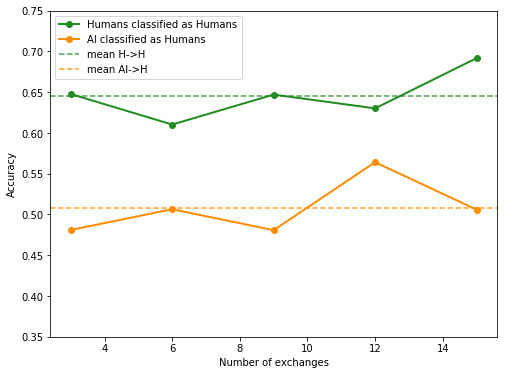

In [159]:
H_len_trend = []
AI_len_trend = []

H_len_trend.append(np.mean(H_responses_len3))
H_len_trend.append(np.mean(H_responses_len6))
H_len_trend.append(np.mean(H_responses_len9))
H_len_trend.append(np.mean(H_responses_len12))
H_len_trend.append(np.mean(H_responses_len15))

AI_len_trend.append(np.mean(AI_responses_len3))
AI_len_trend.append(np.mean(AI_responses_len6))
AI_len_trend.append(np.mean(AI_responses_len9))
AI_len_trend.append(np.mean(AI_responses_len12))
AI_len_trend.append(np.mean(AI_responses_len15))

H_len_trend_rev = [1-x for x in H_len_trend]
AI_len_trend_rev = [1-x for x in AI_len_trend]

print("++++++++  Mean over all length ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_all),2),len(AI_responses_all))

print("++++++++  Length 3 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len3),2))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len3),2))

print("++++++++  Length 6 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len6),2))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len6),2))

print("++++++++  Length 9 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len9),2))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len9),2))

print("++++++++  Length 12 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len12),2))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len12),2))

print("++++++++  Length 15 ++++++++")
print("Percentage of H classified as H",np.round(np.mean(H_responses_len15),2))
print("Percentage of AI classified as AI",np.round(np.mean(AI_responses_len15),2))

plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15],H_len_trend,"o-",lw=2,label='Humans classified as Humans',color='forestgreen')
plt.plot([3,6,9,12,15],AI_len_trend_rev,"o-",lw=2,label='AI classified as Humans',color='darkorange')
#plt.plot([3,6,9,12,15],AI_len_trend,"o--",label='AI classified as AI',color='darkorange',alpha=0.2)
#plt.plot([3,6,9,12,15],H_len_trend_rev,"o--",label='Humans classified as AI',color='forestgreen',alpha=0.2)

plt.axhline(y=np.mean(H_responses_all), color='forestgreen', linestyle='--',alpha=0.8,label='mean H->H')
plt.axhline(y=1-np.mean(AI_responses_all), color='darkorange', linestyle='--',alpha=0.8, label='mean AI->H')

plt.legend()
plt.xlabel("Number of exchanges")
plt.ylabel("Accuracy")
plt.ylim([0.35,0.75])
plt.savefig("Res_allcases.svg")

++++++++  Mean over all length ++++++++
Percentage of H classified as H in H-H 0.63 over trials 1400
Percentage of H classified as H in H-AI 0.68 over trials 1400
Percentage of AI classified as AI in AI-AI 0.44 794
Percentage of AI classified as AI in H-AI 0.53 794
++++++++  Length 3 ++++++++
Percentage of H classified as H in H-H 0.62
Percentage of H classified as H in H-AI 0.69
Percentage of AI classified as AI in AI-AI 0.4
Percentage of AI classified as AI in H-AI 0.61
++++++++  Length 6 ++++++++
Percentage of H classified as H in H-H 0.58
Percentage of H classified as H in H-AI 0.67
Percentage of AI classified as AI in AI-AI 0.43
Percentage of AI classified as AI in H-AI 0.53
++++++++  Length 9 ++++++++
Percentage of H classified as H in H-H 0.64
Percentage of H classified as H in H-AI 0.67
Percentage of AI classified as AI in AI-AI 0.46
Percentage of AI classified as AI in H-AI 0.55
++++++++  Length 12 ++++++++
Percentage of H classified as H in H-H 0.62
Percentage of H classified

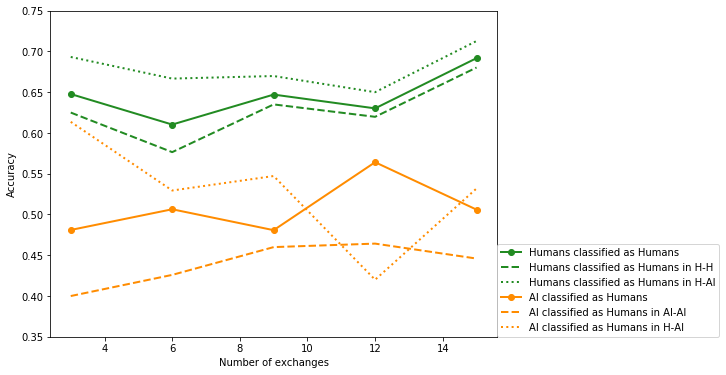

In [160]:
# repeat by separating for H the cases H-H/H-AI and for AI the cases H-AI/AI-AI

H_inHH_len_trend = []
AI_inAIAI_len_trend = []
H_inHAI_len_trend = []
AI_inHAI_len_trend = []

H_inHH_len_trend.append(np.mean(H_inHH_responses_len3))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len6))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len9))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len12))
H_inHH_len_trend.append(np.mean(H_inHH_responses_len15))

AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len3))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len6))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len9))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len12))
AI_inAIAI_len_trend.append(np.mean(AI_inAIAI_responses_len15))
0
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len3))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len6))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len9))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len12))
H_inHAI_len_trend.append(np.mean(H_inHAI_responses_len15))

AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len3))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len6))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len9))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len12))
AI_inHAI_len_trend.append(np.mean(AI_inHAI_responses_len15))

#H_len_trend_rev = [1-x for x in H_len_trend]
#AI_len_trend_rev = [1-x for x in AI_len_trend]

print("++++++++  Mean over all length ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_all),2),"over trials",len(H_responses_all))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_all),2),len(AI_responses_all))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_all),2),len(AI_responses_all))

print("++++++++  Length 3 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len3),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len3),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len3),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len3),2))

print("++++++++  Length 6 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len6),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len6),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len6),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len6),2))

print("++++++++  Length 9 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len9),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len9),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len9),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len9),2))

print("++++++++  Length 12 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len12),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len12),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len12),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len12),2))

print("++++++++  Length 15 ++++++++")
print("Percentage of H classified as H in H-H",np.round(np.mean(H_inHH_responses_len15),2))
print("Percentage of H classified as H in H-AI",np.round(np.mean(H_inHAI_responses_len15),2))
print("Percentage of AI classified as AI in AI-AI",np.round(np.mean(AI_inAIAI_responses_len15),2))
print("Percentage of AI classified as AI in H-AI",np.round(np.mean(AI_inHAI_responses_len15),2))

plt.figure(figsize=(8,6))
plt.plot([3,6,9,12,15],H_len_trend,"o-",lw=2,label='Humans classified as Humans',color='forestgreen')
plt.plot([3,6,9,12,15],H_inHH_len_trend,"--",lw=2,label='Humans classified as Humans in H-H',color='forestgreen')
plt.plot([3,6,9,12,15],H_inHAI_len_trend,":",lw=2,label='Humans classified as Humans in H-AI',color='forestgreen')

plt.plot([3,6,9,12,15],AI_len_trend_rev,"o-",lw=2,label='AI classified as Humans',color='darkorange')
plt.plot([3,6,9,12,15],AI_inAIAI_len_trend,"--",lw=2,label='AI classified as Humans in AI-AI',color='darkorange')
plt.plot([3,6,9,12,15],AI_inHAI_len_trend,":",lw=2,label='AI classified as Humans in H-AI',color='darkorange')

#plt.plot([3,6,9,12,15],AI_len_trend,"o--",label='AI classified as AI',color='darkorange',alpha=0.2)
#plt.plot([3,6,9,12,15],H_len_trend_rev,"o--",label='Humans classified as AI',color='forestgreen',alpha=0.2)

#plt.axhline(y=np.mean(H_responses_all), color='forestgreen', linestyle='--',alpha=0.8,label='mean H->H')
#plt.axhline(y=1-np.mean(AI_responses_all), color='darkorange', linestyle='--',alpha=0.8, label='mean AI->H')

plt.legend(loc=(1,0))
plt.xlabel("Number of exchanges")
plt.ylabel("Accuracy")
plt.ylim([0.35,0.75])
plt.savefig("Res_allcases+allsubclasses.svg")

In [161]:
df_all_res

,hit id,hit len,Alabel,Aresponse,Blabel,Bresponse
0,1,3,AI,[H],H,[AI]
1,1,6,AI,"[H, H, AI, AI, H]",H,"[AI, AI, H, H, H]"
2,1,9,AI,"[H, H, AI, H]",H,"[H, AI, H, H]"
3,1,12,AI,"[H, H]",H,"[AI, AI]"
4,1,15,AI,"[H, AI, AI, H]",H,"[AI, H, H, H]"
5,2,3,AI,"[H, AI, H, AI]",H,"[AI, AI, H, H]"
6,2,6,AI,"[H, H, AI, AI]",H,"[AI, H, H, H]"
7,2,9,AI,"[H, AI, H]",H,"[H, H, AI]"
8,2,12,AI,"[H, H, H, H]",H,"[H, H, AI, AI]"
9,2,15,AI,"[H, AI, AI, AI, AI, AI]",H,"[H, H, H, H, H, H]"


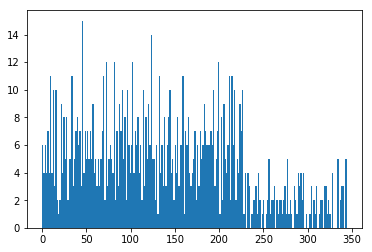

In [162]:
n = plt.hist(rowidc,bins=46*5)

In [163]:
n[0].mean()

4.573913043478261

In [164]:
df_all_res.loc[21]["Aresponse"]

['H', 'AI', 'AI', 'AI']

In [165]:
for l in [3,6,9,12,15]:
    row_index = df_all_res.loc[(df_all_res["hit id"] == 30) & (df_all_res["hit len"] == l)].index[0]
    print(df_all_res.loc[row_index])

hit id                                 30
hit len                                 3
Alabel                                 AI
Aresponse    [AI, AI, AI, AI, AI, AI, AI]
Blabel                                  H
Bresponse          [H, H, H, H, AI, H, H]
Name: 145, dtype: object
hit id                   30
hit len                   6
Alabel                   AI
Aresponse    [H, AI, AI, H]
Blabel                    H
Bresponse    [AI, H, H, AI]
Name: 146, dtype: object
hit id        30
hit len        9
Alabel        AI
Aresponse    [H]
Blabel         H
Bresponse    [H]
Name: 147, dtype: object
hit id                    30
hit len                   12
Alabel                    AI
Aresponse    [AI, AI, AI, H]
Blabel                     H
Bresponse     [H, H, AI, AI]
Name: 148, dtype: object
hit id            30
hit len           15
Alabel            AI
Aresponse    [H, AI]
Blabel             H
Bresponse     [H, H]
Name: 149, dtype: object
